In [3]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from torchvision.transforms import functional as F
import subprocess
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import subprocess
import matplotlib.image as mpimg


Show ten first image from train data set

Image Dimensions : 416 X 416
Image Channels : 3


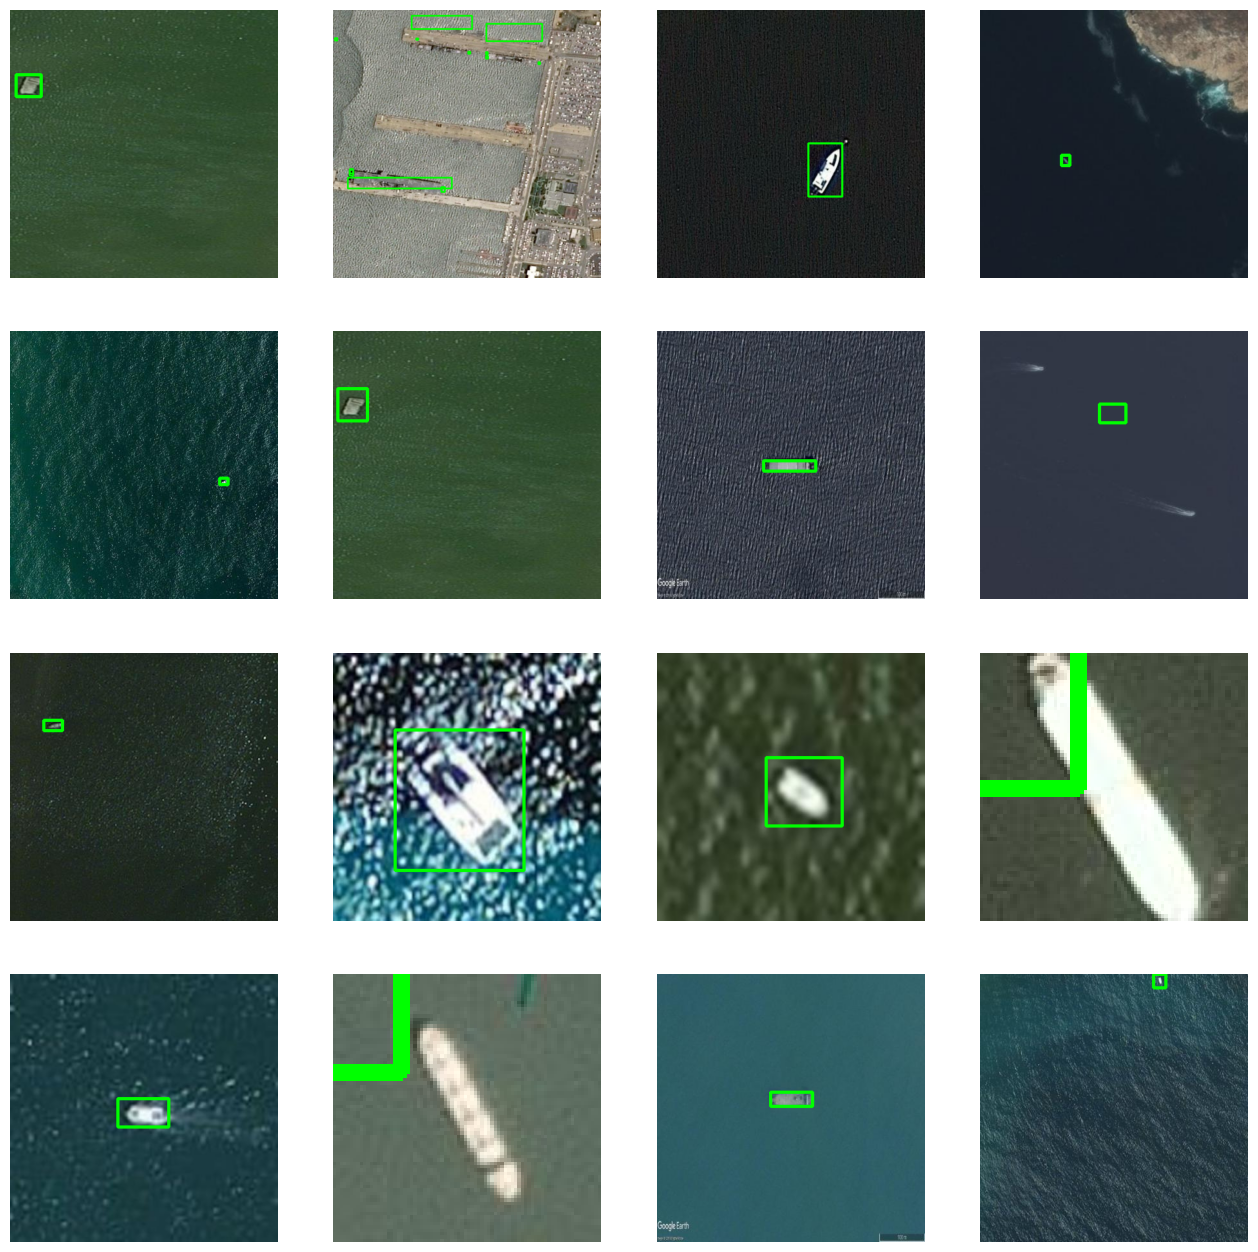

In [23]:
dataset_path = "ships-in-aerial-images/ships-aerial-images"

train_images_path = os.path.join(dataset_path, "train/images")
train_labels_path = os.path.join(dataset_path, "train/labels")

test_images_path = os.path.join(dataset_path, "test/images")
test_labels_path = os.path.join(dataset_path, "test/labels")

valid_images_path = os.path.join(dataset_path, "valid/images")
valid_labels_path = os.path.join(dataset_path, "valid/labels")
num_train_images = len(os.listdir(train_images_path))
num_test_images = len(os.listdir(test_images_path))
num_valid_images = len(os.listdir(valid_images_path))
img = cv2.imread(os.path.join(valid_images_path, random.choice(os.listdir(valid_images_path))))

print("Image Dimensions : {} X {}".format(img.shape[0], img.shape[1]))
print("Image Channels : {}".format(img.shape[2]))
random_img_paths = random.sample(os.listdir(valid_images_path), 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_path in enumerate(random_img_paths):
  row, col = i // 4, i % 4

  image = cv2.imread(os.path.join(valid_images_path, image_path))

  label_file = os.path.splitext(image_path)[0] + ".txt"
  label_path = os.path.join(valid_labels_path, label_file)

  with open(label_path, "r") as f:
    labels = f.read().strip().split("\n")

  for label in labels:
    if len(label.split()) != 5:
        continue

    class_id, x_center, y_center, width, height = map(float, label.split())
    x_min = int((x_center - width/2) * image.shape[1])
    y_min = int((y_center - height/2) * image.shape[0])
    x_max = int((x_center + width/2) * image.shape[1])
    y_max = int((y_center + height/2) * image.shape[0])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

  axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axs[row, col].axis('off')

plt.show()

Train model with yolov8m

In [ ]:
model = YOLO('yolov8m.pt')

# yolov8_ships2
results = model.train(data="ships.yaml", epochs = 8, imgsz = 768, seed = 42, batch = 8, workers = 4)

Train model with yolov8n

In [ ]:
subprocess.run([
    'yolo', 'train',
    'data=ships.yaml',  # Data file
    'model=yolov8n.pt',  # Model configuration
    'epochs=1',  # Number of epochs
    'imgsz=640',  # Image size
    'batch=16',  # Batch size
    'name=yolov8_ships'  # Name of the run
    ])

Test trainded model

In [7]:
def test(model):
    # Define the directory where the custom images are stored
    custom_image_dir = 'ships-in-aerial-images/ships-aerial-images/test/images'

    # Get the list of image files in the directory
    image_files = os.listdir(custom_image_dir)

    # Select 16 random images from the list
    selected_images = random.sample(image_files, 16)

    # Create a figure with subplots for each image
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

    # Iterate over the selected images and plot each one
    for i, img_file in enumerate(selected_images):
        # Compute the row and column index of the current subplot
        row_idx = i // 4
        col_idx = i % 4

        # Load the current image and run object detection
        img_path = os.path.join(custom_image_dir, img_file)
        detect_img = ship_detect(img_path,model)

        # Plot the current image on the appropriate subplot
        axes[row_idx, col_idx].imshow(detect_img)
        axes[row_idx, col_idx].axis('off')

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    # Show the plot
    plt.show()
    
def ship_detect(img_path,model):
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

Test model yolov8n


0: 768x768 (no detections), 328.5ms
Speed: 9.0ms preprocess, 328.5ms inference, 7.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 252.8ms
Speed: 3.0ms preprocess, 252.8ms inference, 4.1ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 254.6ms
Speed: 3.0ms preprocess, 254.6ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 258.0ms
Speed: 3.0ms preprocess, 258.0ms inference, 0.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 3 ships, 273.0ms
Speed: 3.0ms preprocess, 273.0ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 259.0ms
Speed: 3.0ms preprocess, 259.0ms inference, 1.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 278.1ms
Speed: 3.0ms preprocess, 278.1ms inference, 0.0ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 253.0ms
Speed: 3.0ms preprocess, 253.0ms inference, 1.0ms postprocess 

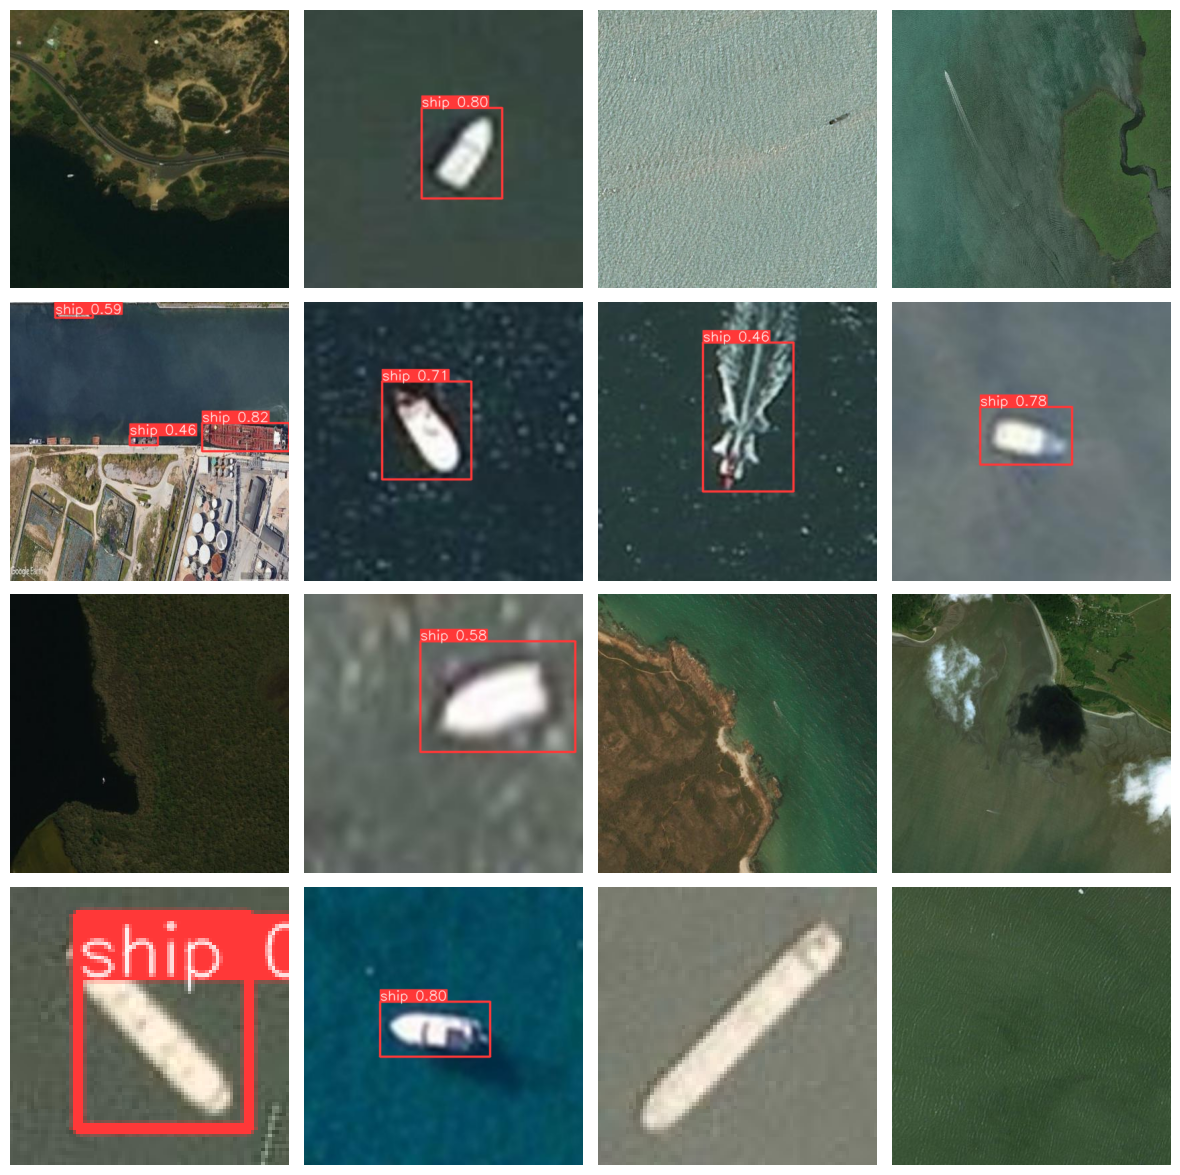

In [8]:

model_yolo8n = YOLO('runs/detect/yolov8_ships1/weights/best.pt')

test(model_yolo8n)

Test model yolo8m


0: 640x640 1 ship, 67.6ms
Speed: 3.0ms preprocess, 67.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 49.6ms
Speed: 2.4ms preprocess, 49.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 ship, 46.8ms
Speed: 2.0ms preprocess, 46.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 46.0ms
Speed: 3.0ms preprocess, 46.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 ships, 45.0ms
Speed: 2.0ms preprocess, 45.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 45.0ms
Speed: 2.0ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 56.8ms
Speed: 3.0ms preprocess, 56.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 640x640 (no detections), 58.7ms
Speed: 3.0ms preprocess, 58.7ms inference, 0.0ms postproces

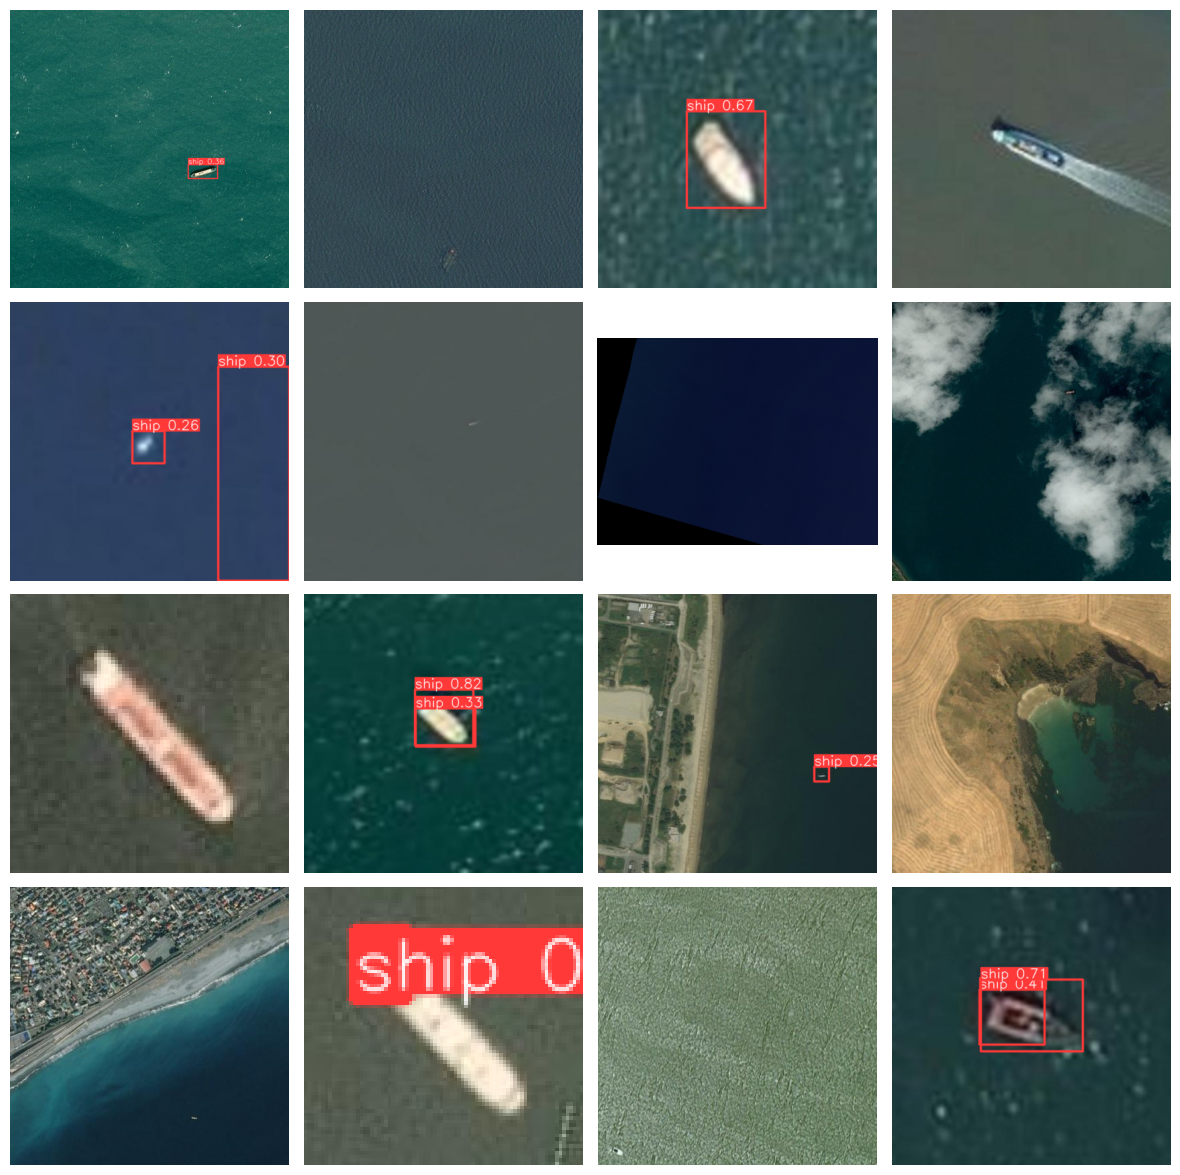

In [9]:
model_yolo8m = YOLO('runs/detect/yolov8_ships2/weights/best.pt')
test(model_yolo8m)

Evaluating the model on the test dataset

Evaluation on model_yolo8n

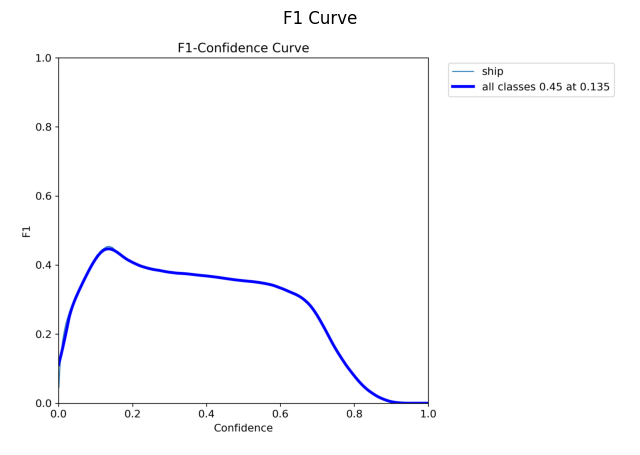

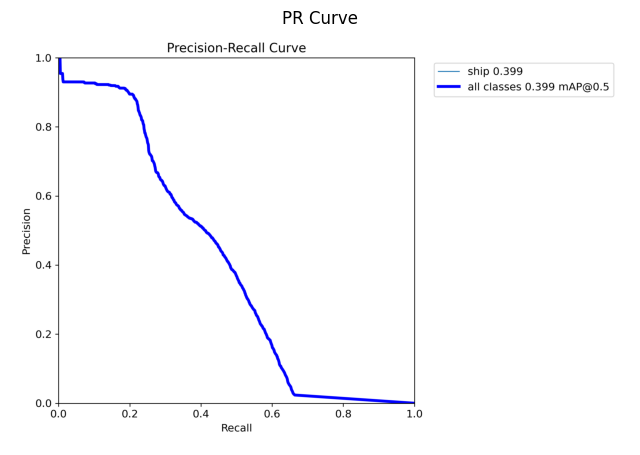

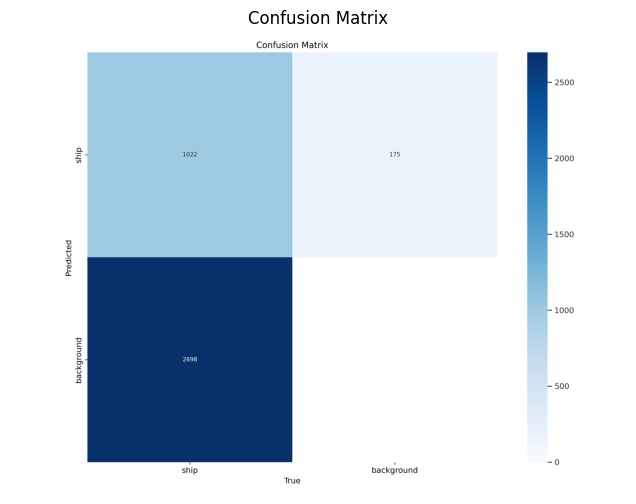

In [18]:

# Load images
img1 = mpimg.imread('runs/detect/yolov8_ships1/F1_curve.png')
img2 = mpimg.imread('runs/detect/yolov8_ships1/PR_curve.png')
img3 = mpimg.imread('runs/detect/yolov8_ships1/confusion_matrix.png')

# Display the first image
plt.figure(figsize=(8, 6))
plt.imshow(img1)
plt.title('F1 Curve')
plt.axis('off')
plt.show()

# Display the second image
plt.figure(figsize=(8, 6))
plt.imshow(img2)
plt.title('PR Curve')
plt.axis('off')
plt.show()

# Display the third image
plt.figure(figsize=(8, 6))
plt.imshow(img3)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()


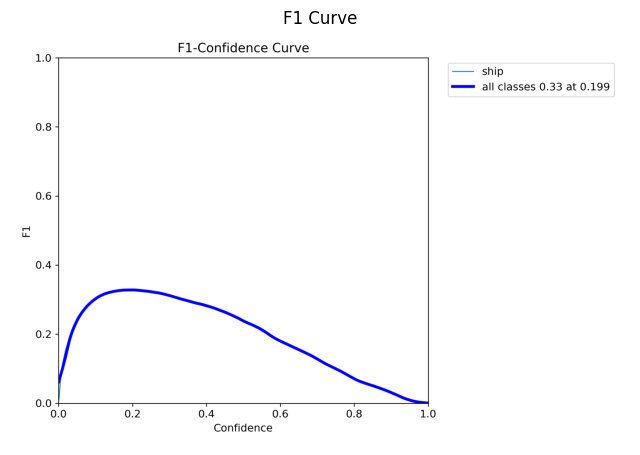

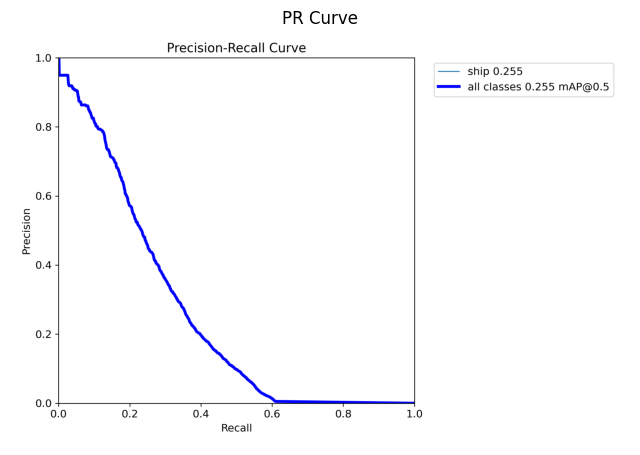

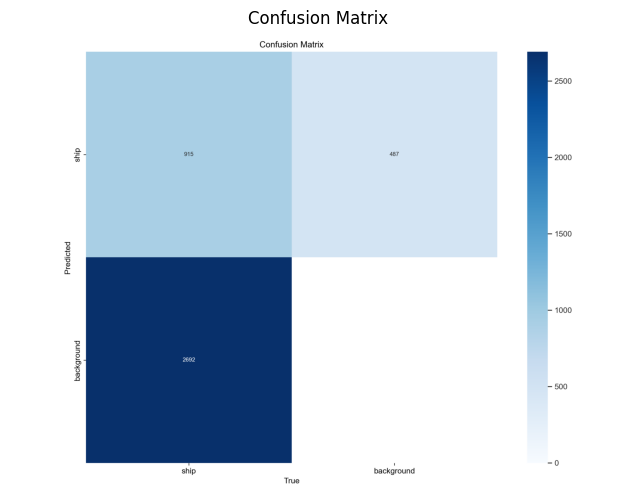

In [19]:

# Load images
img1 = mpimg.imread('runs/detect/yolov8_ships2/F1_curve.png')
img2 = mpimg.imread('runs/detect/yolov8_ships2/PR_curve.png')
img3 = mpimg.imread('runs/detect/yolov8_ships2/confusion_matrix.png')

# Display the first image
plt.figure(figsize=(8, 6))
plt.imshow(img1)
plt.title('F1 Curve')
plt.axis('off')
plt.show()

# Display the second image
plt.figure(figsize=(8, 6))
plt.imshow(img2)
plt.title('PR Curve')
plt.axis('off')
plt.show()

# Display the third image
plt.figure(figsize=(8, 6))
plt.imshow(img3)
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()
